In [1]:
import gdown

# Replace 'file_id' with the actual file ID you want to download
file_id = '1ljfAeHD4UJO55OM7SCnZ8N16SOay9L_2'

# Replace 'output' with the desired output file name
output = 'blob'

# Use the gdown.download method to download the file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1ljfAeHD4UJO55OM7SCnZ8N16SOay9L_2
To: d:\Deep Learning\Deep-Learning-Assignments\2020128-A1\blob
100%|██████████| 16.5M/16.5M [00:01<00:00, 8.54MB/s]


'blob'

In [2]:
import tarfile
import lzma

# Replace 'your_file.tar.xz' with the actual name of your tar.xz file
tar_xz_file = 'blob'

# Replace 'extracted_folder' with the desired folder name for extraction
output_folder = 'extracted_folder'

# Open the tar.xz file for reading using the lzma module
with lzma.open(tar_xz_file, 'rb') as f:
    # Open the tar file for reading
    with tarfile.open(fileobj=f, mode='r') as tar:
        # Extract all contents to the specified folder
        tar.extractall(output_folder)

print(f'The contents of {tar_xz_file} have been extracted to {output_folder}.')


The contents of blob have been extracted to extracted_folder.


In [3]:
import time

def loading_time_calculator(dataloader):
    t1 = time.time()
    print("hello ",t1)
    for data in dataloader:
        # print(data)
        pass

    t2 = time.time()
    # print("hello2 ", t2)

    return t2 - t1

In [4]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

class CustomDataset:
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.data = self.load_dataset()

    def load_dataset(self):
        dataset = []
        for digit in os.listdir(self.root_dir):
            digit_path = os.path.join(self.root_dir, digit)
            for image_file in os.listdir(digit_path):
                image_path = os.path.join(digit_path, image_file)
                label = int(digit)
                dataset.append((image_path, label))
        return dataset

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = np.array(Image.open(img_path))
        return image, label

# Example usage:
root_dir = 'extracted_folder/MNIST_DATASET/trainingSet/trainingSet'
custom_dataset = CustomDataset(root_dir)
train_data_custom, val_data_custom = train_test_split(custom_dataset, test_size=0.1, random_state=42)

# Print the number of samples in the dataset
print(len(custom_dataset))
print(len(train_data_custom))
print(len(val_data_custom))

# Access a sample from the dataset
sample_image, sample_label = custom_dataset[0]
print(f"Label: {sample_label}, Image Shape: {sample_image.shape}")


42000
37800
4200
Label: 0, Image Shape: (28, 28)


In [5]:
class CustomDataLoader:
    def __init__(self, dataset, batch_size, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = list(range(len(dataset)))
        self.current_index = 0

        if self.shuffle:
            np.random.shuffle(self.indices)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self.indices):
            raise StopIteration

        batch_indices = self.indices[self.current_index:self.current_index + self.batch_size]
        batch_data = [self.dataset[i] for i in batch_indices]

        self.current_index += self.batch_size

        images, labels = zip(*batch_data)
        return np.array(images), np.array(labels)


In [6]:
batch_sizes = [128, 256, 512, 1024]

In [7]:
custom_time=[]
for i in batch_sizes:
    custom_dataloader = CustomDataLoader(custom_dataset, i)
    duration = loading_time_calculator(custom_dataloader)
    custom_time.append(duration)

print(custom_time)
# for i in range(0, len(custom_dataset), batch_size):
#     batch_data = custom_dataset[i:i+batch_size]
    # Process the batch as needed


hello  1706966084.065113
hello  1706966133.1249433
hello  1706966139.1442833
hello  1706966145.188384
[49.05174684524536, 6.0193400382995605, 6.044100761413574, 6.01112174987793]


In [8]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root='extracted_folder/MNIST_DATASET/trainingSet/trainingSet', transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=4)


In [9]:
# time2 = loading_time_calculator(train_loader)

torch_time = []
for i in batch_sizes:
    torch_dataloader = DataLoader(dataset=train_dataset, batch_size=i, shuffle=True, num_workers=4)
    duration = loading_time_calculator(torch_dataloader)
    torch_time.append(duration)

# print(time2)

hello  1706966156.408645
hello  1706966211.8583329
hello  1706966228.1346462
hello  1706966243.582175


In [10]:
print(torch_time)

[55.44968795776367, 16.276313304901123, 15.447528839111328, 15.693294525146484]


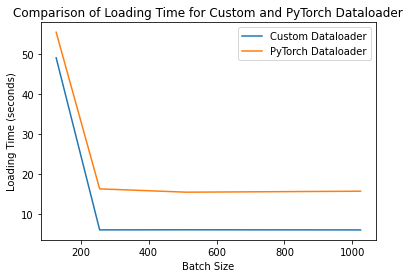

In [11]:
import matplotlib.pyplot as plt
plt.plot(batch_sizes, custom_time, label='Custom Dataloader')
plt.plot(batch_sizes, torch_time, label='PyTorch Dataloader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.title('Comparison of Loading Time for Custom and PyTorch Dataloader')
plt.legend()
plt.show()

In [12]:
custom_dataloader = CustomDataLoader(custom_dataset, 512)

In [13]:
custom_dataset[0]

(array([[  3,   0,   0,   3,   7,   3,   0,   3,   0,  11,   0,   0,   3,
           0,   0,   3,   8,   0,   0,   3,   0,   0,   0,   2,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   1,   5,   0,  12,   0,  16,
           0,   0,   4,   0,   2,   8,   3,   0,   4,   8,   0,   0,   0,
           0,   0],
        [  0,   0,   2,   0,   0,   0,   1,   2,   1,  12,   0,   8,   0,
           0,   6,   0,  11,   0,   0,   6,   7,   2,   0,   0,   0,   0,
           0,   0],
        [  0,   1,   3,   0,   0,   2,   3,   0,   0,   0,  12,   0,   0,
          23,   0,   0,   0,   0,  11,   3,   0,   0,   4,   0,   0,   0,
           0,   0],
        [  0,   1,   1,   0,   0,   2,   0,   0,   6,   0,  25,  27, 136,
         135, 188,  89,  84,  25,   0,   0,   3,   1,   0,   0,   0,   0,
           0,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   3,  88, 247, 236, 255,
         249, 250, 227, 240, 136,  37,   1,   0,   2,   2,   0,   0,   0,
           0

In [14]:
train_dataset[0]

(tensor([[[0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0078,  ...,

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Feed-Forward neural network architecture
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)  # Output layer with 10 classes (assuming MNIST dataset)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model, loss function, and optimizer
model = FeedForwardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
  # You can adjust this as needed


In [16]:
num_epochs = 60
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    # print("hello epoch")
    custom_dataloader = CustomDataLoader(train_data_custom, 512)
    for inputs, labels in custom_dataloader:
        # print("hello data")
        inputs = torch.from_numpy(inputs).float()
        labels = torch.from_numpy(labels).long()

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        # print(predicted)
        # print("bleh")
        # print(labels)
        total_correct += (predicted == labels).sum().item()
        # print("total correct: ",total_correct)
        # print("total samples: ",total_samples)
        total_samples += labels.size(0)

    # print("epoch end")
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')
    accuracy = total_correct / total_samples
    print(f'Epoch {epoch}, Accuracy on Training Set: {accuracy}')

    total_correct = 0
    total_samples = 0

    validation_dataloader = CustomDataLoader(val_data_custom, 512)
    for inputs, labels in validation_dataloader:
        # print("hello data")
        inputs = torch.from_numpy(inputs).float()
        labels = torch.from_numpy(labels).long()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)

        total_correct += (predicted == labels).sum().item()

        total_samples += labels.size(0)

    # print("epoch end")
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {loss.item()}')
    accuracy = total_correct / total_samples
    print(f'Epoch {epoch}, Accuracy on Validation Set: {accuracy}')


# After training, you can use the model for predictions
# Example:
# test_inputs, test_labels = next(iter(test_dataloader))
# test_inputs = torch.from_numpy(test_inputs).float()
# predictions = model(test_inputs)


Epoch [1/60], Loss: 2.247560977935791
Epoch 0, Accuracy on Training Set: 0.1465873015873016
Epoch [1/60], Validation Loss: 2.281677484512329
Epoch 0, Accuracy on Validation Set: 0.18071428571428572
Epoch [2/60], Loss: 2.105684757232666
Epoch 1, Accuracy on Training Set: 0.20846560846560847
Epoch [2/60], Validation Loss: 2.072467088699341
Epoch 1, Accuracy on Validation Set: 0.2509523809523809
Epoch [3/60], Loss: 1.9379907846450806
Epoch 2, Accuracy on Training Set: 0.28224867724867725
Epoch [3/60], Validation Loss: 1.8139773607254028
Epoch 2, Accuracy on Validation Set: 0.3404761904761905
Epoch [4/60], Loss: 1.7771236896514893
Epoch 3, Accuracy on Training Set: 0.37767195767195766
Epoch [4/60], Validation Loss: 1.7569791078567505
Epoch 3, Accuracy on Validation Set: 0.44571428571428573
Epoch [5/60], Loss: 1.5582245588302612
Epoch 4, Accuracy on Training Set: 0.48732804232804233
Epoch [5/60], Validation Loss: 1.435165286064148
Epoch 4, Accuracy on Validation Set: 0.5504761904761905
Epoc